# Processing of the results

First some imports

In [1]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

### Result Consolidation
Next, we read all finalized CSV files from the given input directories and concatenate them into one DataFrame:

In [2]:
# Some variables used over the whole notebook
sample = "churyumov-gerasimenko"
output_directory = Path(f"./results/{sample}")
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    [
        Path(f"./results/{sample}/pretrain/re-validation"),
        Path(f"./results/{sample}/re-validation"),
        Path(f"./results/{sample}/posttrain/re-validation"),
        Path(f"./results/{sample}/posttrain/posttrain-0_1"),
        Path(f"./results/{sample}/posttrain/posttrain-1"),
        Path(f"./results/{sample}/polyhedral-total-cg-adaptive-noise-1"),
        Path(f"./results/{sample}/polyhedral-total-cg-adaptive-noise-2"),
        Path(f"./results/{sample}/polyhedral-total-cg-adaptive-noise-3"),
        Path(f"./results/{sample}/polyhedral-total-cg-adaptive-noise-4"),
        Path(f"./results/{sample}/integration"),
        Path(f"./results/{sample}/short")
    ],
    include=["validation_final_result.csv", "results.csv"],
    exclude=["validation_results.csv"]
)
df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,...,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,low_resolution,validation_batch_size
0,churyumov-gerasimenko,NaN,results/pretrain-3,9,2500,2023,polyhedral,0.1%,normalized_L1_loss,1000,...,0.243009,0.319324,0.891220,0.387531,0.340218,0.376631,1.229114,0.456091,NaN,NaN
1,churyumov-gerasimenko,NaN,results/pretrain-3,4,2500,42,polyhedral,0.1%,normalized_L1_loss,1000,...,0.243016,0.319383,0.889810,0.387722,0.338965,0.375233,1.200275,0.447725,NaN,NaN
2,churyumov-gerasimenko,NaN,results/pretrain-3,8,2500,1999,polyhedral,0.1%,normalized_L1_loss,1000,...,0.243368,0.319846,0.890820,0.388085,0.341383,0.378013,1.246698,0.462277,NaN,NaN
3,churyumov-gerasimenko,NaN,results/pretrain-3,7,2500,433,polyhedral,0.1%,normalized_L1_loss,1000,...,0.242342,0.318495,0.888598,0.387430,0.339693,0.376133,1.234056,0.459495,NaN,NaN
4,churyumov-gerasimenko,NaN,results/pretrain-3,2,2500,9,polyhedral,0.1%,normalized_L1_loss,1000,...,0.243368,0.319820,0.893603,0.389279,0.339952,0.376413,1.226245,0.456085,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,churyumov-gerasimenko,NaN,results/short-cg-0100,65,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.602984,0.769187,2.179726,0.934835,0.747076,0.813411,2.484438,0.901915,NaN,100.0
1480,churyumov-gerasimenko,NaN,results/short-cg-0100,66,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.613578,0.766926,2.448808,1.043683,0.662066,0.718007,2.419831,0.888199,NaN,100.0
1481,churyumov-gerasimenko,NaN,results/short-cg-0100,67,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.566533,0.721184,2.102039,0.905575,0.677041,0.737325,2.284667,0.832000,NaN,100.0
1482,churyumov-gerasimenko,NaN,results/short-cg-0100,68,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.606174,0.758911,2.434705,1.039560,0.640395,0.695879,2.311109,0.859623,NaN,100.0


In [3]:
# Replace resolution in-place with "10%" if column "low_resolution" has value True and drop the unnecessary column
df["low_resolution"].fillna(False, inplace=True)
df.loc[df["low_resolution"], "resolution"] = "10%"
df.drop("low_resolution", axis=1, inplace=True)
df["resolution"].fillna("100%", inplace=True)

# Adapt the line pretrained_model to the new format
df["pretrained_model"].fillna("None", inplace=True)
df.loc[df["pretrained_model"].str.contains("pretrain-3"), "pretrained_model"] = "0.1%"
df.loc[df["pretrained_model"].str.contains("pretrain-2"), "pretrained_model"] = "1%"
df.loc[df["pretrained_model"].str.contains("pretrain-0|pretrain-1"), "pretrained_model"] = "10%"

# c refers to the last model, not the first and can be re-calculated --> drop it
df.drop(["c"], axis=1, inplace=True)

In [4]:
df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,...,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,validation_batch_size
0,churyumov-gerasimenko,None,results/pretrain-3,9,2500,2023,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001742,0.243009,0.319324,0.891220,0.387531,0.340218,0.376631,1.229114,0.456091,NaN
1,churyumov-gerasimenko,None,results/pretrain-3,4,2500,42,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001757,0.243016,0.319383,0.889810,0.387722,0.338965,0.375233,1.200275,0.447725,NaN
2,churyumov-gerasimenko,None,results/pretrain-3,8,2500,1999,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001754,0.243368,0.319846,0.890820,0.388085,0.341383,0.378013,1.246698,0.462277,NaN
3,churyumov-gerasimenko,None,results/pretrain-3,7,2500,433,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001743,0.242342,0.318495,0.888598,0.387430,0.339693,0.376133,1.234056,0.459495,NaN
4,churyumov-gerasimenko,None,results/pretrain-3,2,2500,9,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001739,0.243368,0.319820,0.893603,0.389279,0.339952,0.376413,1.226245,0.456085,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,churyumov-gerasimenko,None,results/short-cg-0100,65,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.004011,0.602984,0.769187,2.179726,0.934835,0.747076,0.813411,2.484438,0.901915,100.0
1480,churyumov-gerasimenko,None,results/short-cg-0100,66,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.000054,0.613578,0.766926,2.448808,1.043683,0.662066,0.718007,2.419831,0.888199,100.0
1481,churyumov-gerasimenko,None,results/short-cg-0100,67,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.000157,0.566533,0.721184,2.102039,0.905575,0.677041,0.737325,2.284667,0.832000,100.0
1482,churyumov-gerasimenko,None,results/short-cg-0100,68,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.000172,0.606174,0.758911,2.434705,1.039560,0.640395,0.695879,2.311109,0.859623,100.0


And then we save the unified DataFrame to a CSV file, which can be uploaded to the repository since it contains everything in a readable nice format:

In [5]:
filename = f"total_results_{sample}.csv"
df.to_csv(output_directory.joinpath(filename), index=False)

# Processing and Data Visualization

This step uses the previously created CSV file to create a DataFrame that is easier to work with and independent of the used input directories. Start here, if you just have the file with all results.

In [6]:
filename = f"total_results_{sample}.csv"
df = pd.read_csv(output_directory.joinpath(filename))
df_copy = df.copy()

In [7]:
interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,churyumov-gerasimenko,None,2023,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464906,0.451826,0.517527,0.396562,0.329448,0.103043,0.062150,0.015749,0.008338,0.001742
1,churyumov-gerasimenko,None,42,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478600,0.472800,0.474701,0.401489,0.324469,0.103753,0.062361,0.015831,0.008355,0.001757
2,churyumov-gerasimenko,None,1999,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.467474,0.452431,0.570987,0.391071,0.328477,0.103552,0.062586,0.015889,0.008337,0.001754
3,churyumov-gerasimenko,None,433,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.475617,0.472834,0.478239,0.395436,0.325620,0.103527,0.062006,0.015869,0.008348,0.001743
4,churyumov-gerasimenko,None,9,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478060,0.467077,0.451270,0.394462,0.327116,0.103045,0.063098,0.015793,0.008359,0.001739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 1.467314]",100,300000,0.920940,0.992968,0.921917,0.845438,0.713355,0.433361,0.205286,0.036944,0.019095,0.004011
1480,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",100,300000,0.957985,0.787022,0.786355,0.732946,0.665499,0.352562,0.134356,0.000976,0.000274,0.000054
1481,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.1]",100,300000,0.794960,1.083041,0.779224,0.714813,0.618428,0.409301,0.214353,0.007316,0.002109,0.000157
1482,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.01]",100,300000,0.852810,0.740580,0.734967,0.683860,0.620155,0.397191,0.162305,0.002100,0.000874,0.000172


Time to replace the altitudes and make them more readable:

In [8]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print("The normalized altitudes are:")
print(ALTITUDES)
print("The converted altitudes to [km] are:")
print(unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='km'))

The normalized altitudes are:
[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
The converted altitudes to [km] are:
[3.12660645e-03 1.56330322e-02 3.12660645e-02 1.56330322e-01
 3.12660645e-01 1.56330322e+00 3.12660645e+00 1.56330322e+01
 3.12660645e+01 1.56330322e+02]


In [9]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,churyumov-gerasimenko,None,2023,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464906,0.451826,0.517527,0.396562,0.329448,0.103043,0.062150,0.015749,0.008338,0.001742
1,churyumov-gerasimenko,None,42,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478600,0.472800,0.474701,0.401489,0.324469,0.103753,0.062361,0.015831,0.008355,0.001757
2,churyumov-gerasimenko,None,1999,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.467474,0.452431,0.570987,0.391071,0.328477,0.103552,0.062586,0.015889,0.008337,0.001754
3,churyumov-gerasimenko,None,433,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.475617,0.472834,0.478239,0.395436,0.325620,0.103527,0.062006,0.015869,0.008348,0.001743
4,churyumov-gerasimenko,None,9,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478060,0.467077,0.451270,0.394462,0.327116,0.103045,0.063098,0.015793,0.008359,0.001739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 1.467314]",100,300000,0.920940,0.992968,0.921917,0.845438,0.713355,0.433361,0.205286,0.036944,0.019095,0.004011
1480,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",100,300000,0.957985,0.787022,0.786355,0.732946,0.665499,0.352562,0.134356,0.000976,0.000274,0.000054
1481,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.1]",100,300000,0.794960,1.083041,0.779224,0.714813,0.618428,0.409301,0.214353,0.007316,0.002109,0.000157
1482,churyumov-gerasimenko,None,2023,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.01]",100,300000,0.852810,0.740580,0.734967,0.683860,0.620155,0.397191,0.162305,0.002100,0.000874,0.000172


In [10]:
unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [11]:
df = df.drop(
    ["sample", "seed"], axis=1
)
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df["iterations"] = df["iterations"].apply(lambda x: str(x))


# Melt columns "ground_truth" and "pretrained_model" into one column called "training_type"
df["training_type"] = df["ground_truth"] + " (" + df["pretrained_model"] + ", " + df["iterations"] + ")"
df.drop(["ground_truth", "pretrained_model", "iterations"], axis=1, inplace=True)

# Just select those columns with resolution 100% and drop the resolution column
df = df[df["resolution"] == "100%"]
df.drop("resolution", axis=1, inplace=True)

df.groupby(["sample_domain", "noise", "training_type"]).mean()

integration_points  \
sample_domain noise                              training_type                                  
[0. 1.]       ['']                               mascon (None, 10000)                350000.0   
                                                 polyhedral (None, 10000)            350000.0   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)                350000.0   
                                                 polyhedral (None, 10000)            350000.0   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)                350000.0   
...                                                                                       ...   
[3. 5.]       ['gaussian', 0.0, 1.467314]        polyhedral (1%, 1000)               300000.0   
                                                 polyhedral (10%, 1000)              300000.0   
                                                 polyhedral (None, 10)               300000.0   
                                                 polyhedral (None, 100)              300000.0   
                                                 polyhedral (None, 10000)            350000.0   

                                                                              0.001  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.061908   
                                                 polyhedral (None, 10000)  0.062994   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.058789   
                                                 polyhedral (None, 10000)  0.050744   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)      0.065318   
...                                                                             ...   
[3. 5.]       ['gaussian', 0.0, 1.467314]        polyhedral (1%, 1000)     0.884833   
                                                 polyhedral (10%, 1000)    1.215827   
                                                 polyhedral (None, 10)     1.066138   
                                                 polyhedral (None, 100)    1.226234   
                                                 polyhedral (None, 10000)  1.339588   

                                                                              0.005  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.043392   
                                                 polyhedral (None, 10000)  0.050231   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.044493   
                                                 polyhedral (None, 10000)  0.099066   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)      0.054668   
...                                                                             ...   
[3. 5.]       ['gaussian', 0.0, 1.467314]        polyhedral (1%, 1000)     0.896563   
                                                 polyhedral (10%, 1000)    1.231835   
                                                 polyhedral (None, 10)     1.082110   
                                                 polyhedral (None, 100)    1.237186   
                                                 polyhedral (None, 10000)  1.341779   

                                                                               0.01  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.024855   
                                                 polyhedral (None, 10000)  0.026804   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.026402   
                                                 polyhedral (None, 10000)  0.024510   
              ['adaptive_ga

Time for plotting. First make the DataFrame wide

In [12]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["sample_domain", "noise", "training_type"], str_altitudes, var_name="Distance", value_name=error_of_interest)


dfm = dfm[dfm["noise"] != "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]"]
dfm = dfm[dfm["noise"] != "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"]


noise_replacement = {
    "['']" : "No Noise",
    "['constant_bias', [0.000272, 0.0, 0.0]]": "Constant Bias $c = 0.000272$",
    "['gaussian', 0.0, 0.146731]": "Additive Gaussian $\mu = 0 \; \sigma= 0.14$",
    "['gaussian', 0.0, 1.467314]": "Additive Gaussian $\mu = 0 \; \sigma= 1.47$",
    "['adaptive_gaussian_noise', 0.001]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.001$",
    "['adaptive_gaussian_noise', 0.01]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$",
    "['adaptive_gaussian_noise', 0.1]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$"
}

sample_distance_replacement = {
    "[0. 1.]": "$(0, 1)$",
    "[1. 3.]": "$(1, 3)$",
    "[3. 5.]": "$(3, 5)$",
}

for key, replacement in noise_replacement.items():
     dfm["noise"].replace(key, replacement, inplace=True)

for key, replacement in sample_distance_replacement.items():
    dfm["sample_domain"].replace(key, replacement, inplace=True)


dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,training_type,Distance,relRMSE
0,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 1.47$,"mascon (None, 10000)",0.001,1.235477
2,"$(0, 1)$",No Noise,"mascon (None, 10000)",0.001,0.129189
3,"$(3, 5)$",Constant Bias $c = 0.000272$,"mascon (None, 10000)",0.001,0.843429
5,"$(1, 3)$",Additive Gaussian $\mu = 0 \; \sigma= 0.14$,"mascon (None, 10000)",0.001,0.921531
6,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.14$,"mascon (None, 10000)",0.001,1.179126
...,...,...,...,...,...
14535,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 1.47$,"polyhedral (None, 100)",50.000,0.004011
14536,"$(3, 5)$",Constant Bias $c = 0.000272$,"polyhedral (None, 100)",50.000,0.000054
14537,"$(3, 5)$",Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$,"polyhedral (None, 100)",50.000,0.000157
14538,"$(3, 5)$",Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$,"polyhedral (None, 100)",50.000,0.000172


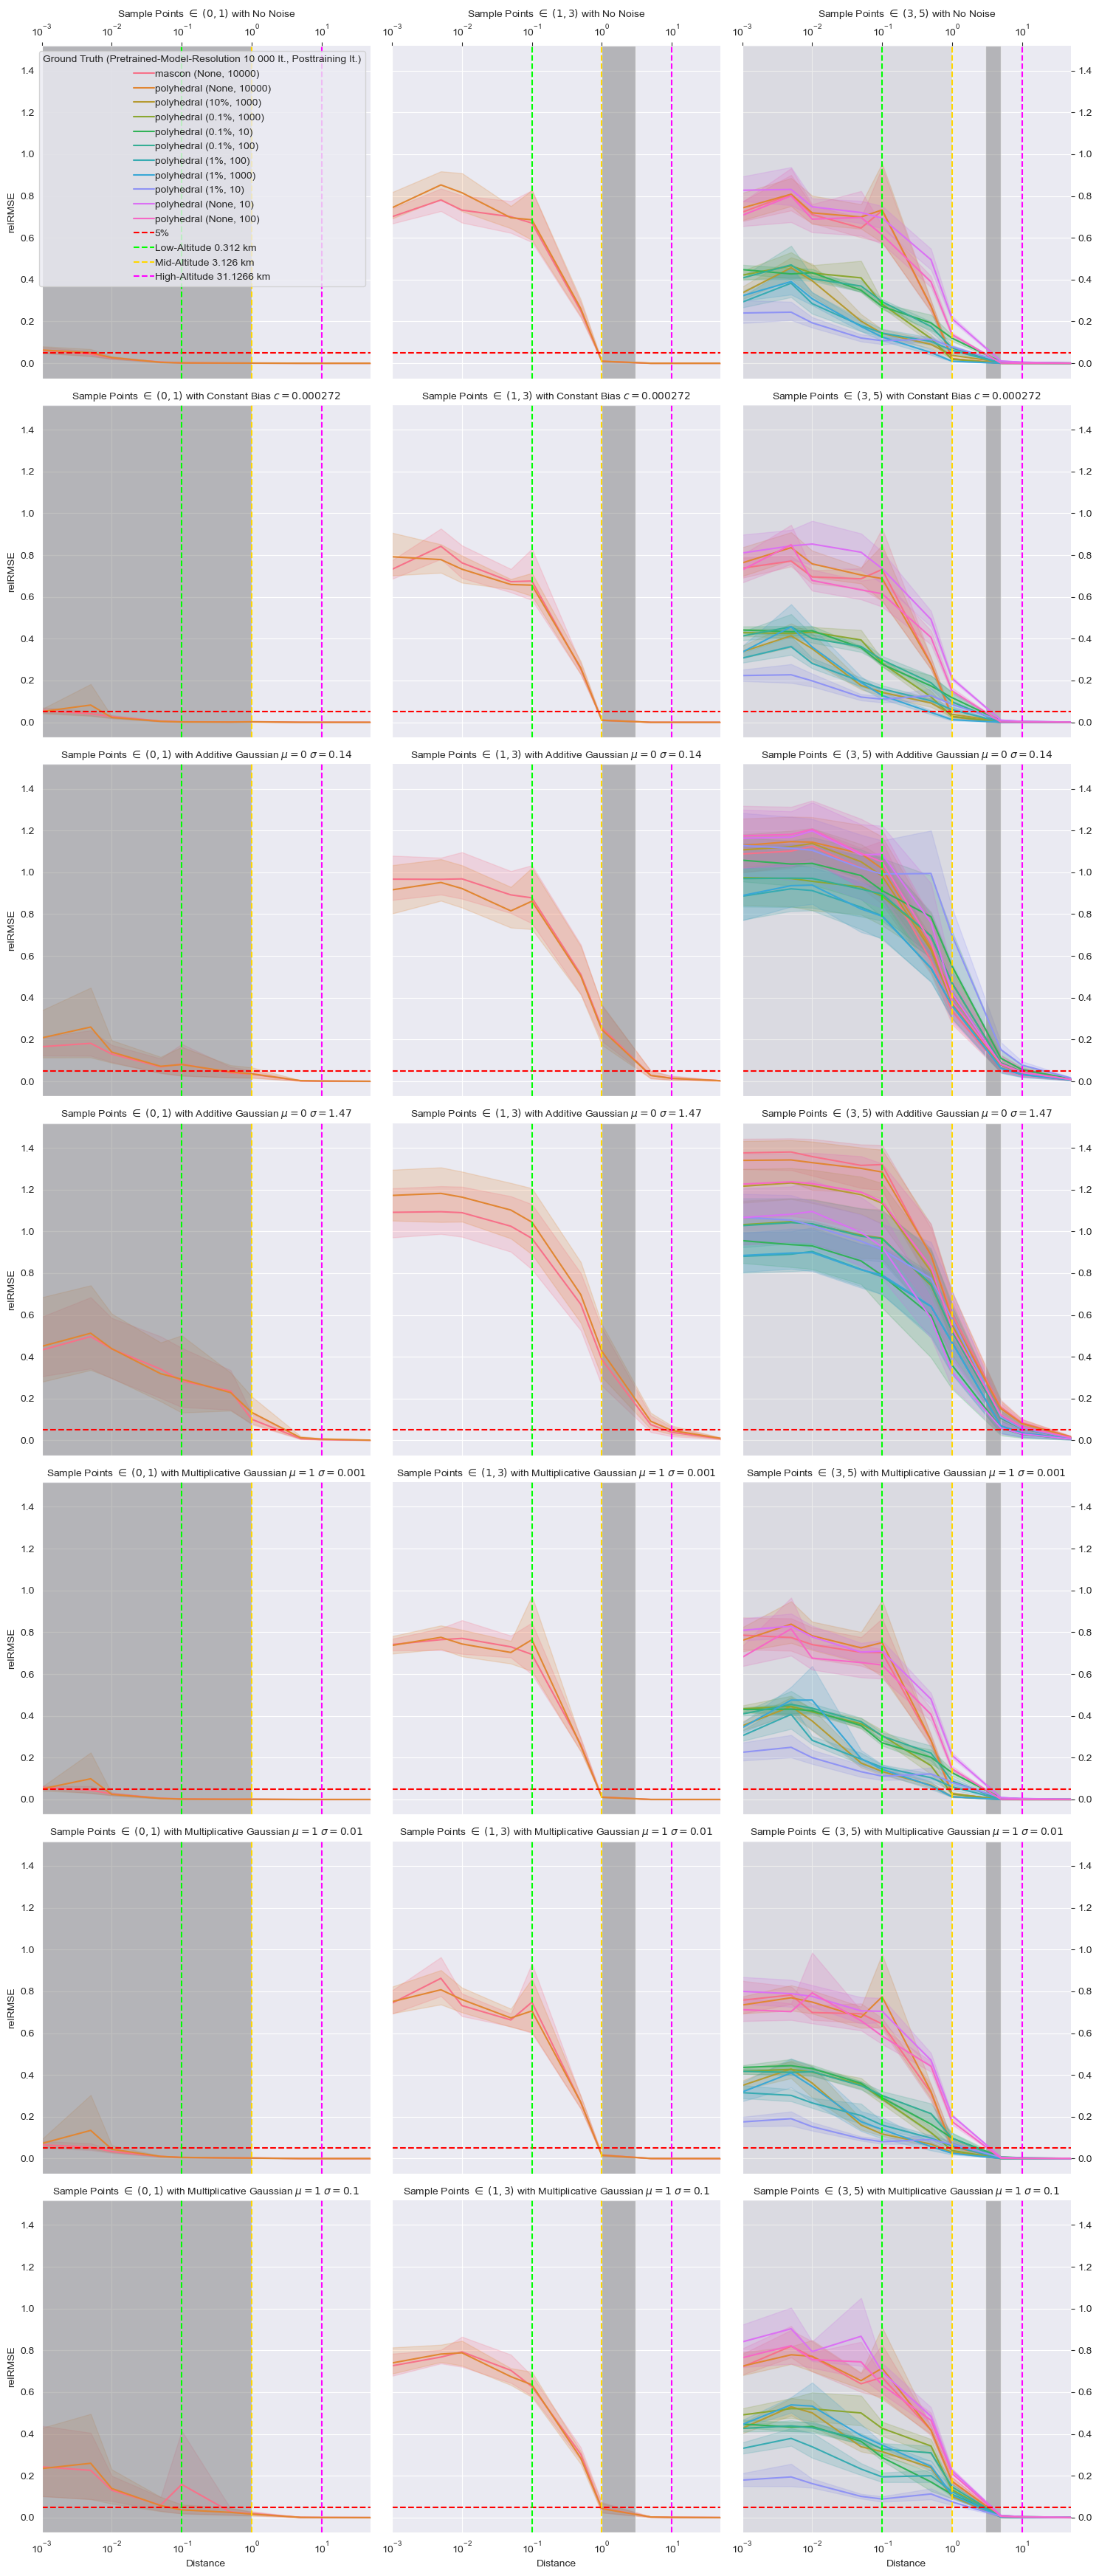

In [13]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=sorted(sample_distance_replacement.values()),
    row_order=noise_replacement.values(),
    hue="training_type",
    facet_kws=dict(legend_out=False)
)

g.set_titles("Sample Points $\in$ {col_name} with {row_name}")


g.set(xlim=(0.0, 50.0), xscale='log')#, yscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="Low-Altitude 0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="Mid-Altitude 3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="High-Altitude 31.1266 km")



for ax in g.axes[0,:]:
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    ax.set_xlabel("Distance")
    ax.xaxis.set_label_position('top')
for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
    ax.axvspan(0.0, 1.0, facecolor='gray', alpha=0.15)
    ax.tick_params(right=True, labelright=True, labelrotation=0)

g.legend.remove()
g.add_legend(handletextpad=0.1, title="Ground Truth (Pretrained-Model-Resolution 10 000 It., Posttraining It.)")
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

## Analysis of the pretraining results


In [16]:
df = df_copy.copy()

# Select from df where pretrained_model is None, and sample_domain is [0.0, 1.0], and noise is ['']
df = df.loc[(df["ground_truth"] == "polyhedral") & (df["sample_domain"] == "[0.0, 1.0]") & (df["noise"] == "['']") & (df["integration_points"] == 300000)]

df = df[interesting_columns]

In [17]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,churyumov-gerasimenko,None,2023,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464906,0.451826,0.517527,0.396562,0.329448,0.103043,0.062150,0.015749,0.008338,1.742323e-03
1,churyumov-gerasimenko,None,42,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478600,0.472800,0.474701,0.401489,0.324469,0.103753,0.062361,0.015831,0.008355,1.757146e-03
2,churyumov-gerasimenko,None,1999,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.467474,0.452431,0.570987,0.391071,0.328477,0.103552,0.062586,0.015889,0.008337,1.753712e-03
3,churyumov-gerasimenko,None,433,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.475617,0.472834,0.478239,0.395436,0.325620,0.103527,0.062006,0.015869,0.008348,1.742616e-03
4,churyumov-gerasimenko,None,9,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478060,0.467077,0.451270,0.394462,0.327116,0.103045,0.063098,0.015793,0.008359,1.738641e-03
5,churyumov-gerasimenko,None,37,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.465664,0.459657,0.470242,0.396847,0.328892,0.104346,0.062988,0.015752,0.008304,1.745896e-03
6,churyumov-gerasimenko,None,3,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464653,0.461133,0.477853,0.399477,0.328099,0.103878,0.062782,0.015844,0.008324,1.742061e-03
7,churyumov-gerasimenko,None,7,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.460479,0.463982,0.461303,0.395540,0.330322,0.104430,0.062813,0.015865,0.008328,1.750702e-03
8,churyumov-gerasimenko,None,67,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.466892,0.475299,0.489632,0.395335,0.327961,0.100603,0.063098,0.015733,0.008276,1.733406e-03
9,churyumov-gerasimenko,None,99,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.476139,0.457829,0.474786,0.397273,0.329882,0.103737,0.062244,0.015776,0.008308,1.736266e-03


In [18]:
df.drop(columns=["sample", "iterations", "seed", "integration_points"], inplace=True)
df.groupby(["resolution"]).mean()

,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
resolution,,,,,,,,,,
0.1%,0.469848,0.463487,0.486654,0.396349,0.328028,0.103391,0.062613,0.015810,0.008328,0.001744
1%,0.112039,0.109445,0.095038,0.057496,0.043482,0.017017,0.010154,0.002549,0.001357,0.000288
10%,0.056727,0.036161,0.020256,0.004379,0.002057,0.001031,0.000894,0.000076,0.000037,0.000007
100%,0.058438,0.041732,0.022997,0.003187,0.001138,0.000740,0.000629,0.000056,0.000029,0.000006


In [19]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["resolution"], str_altitudes, var_name="Distance", value_name=error_of_interest)

dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))

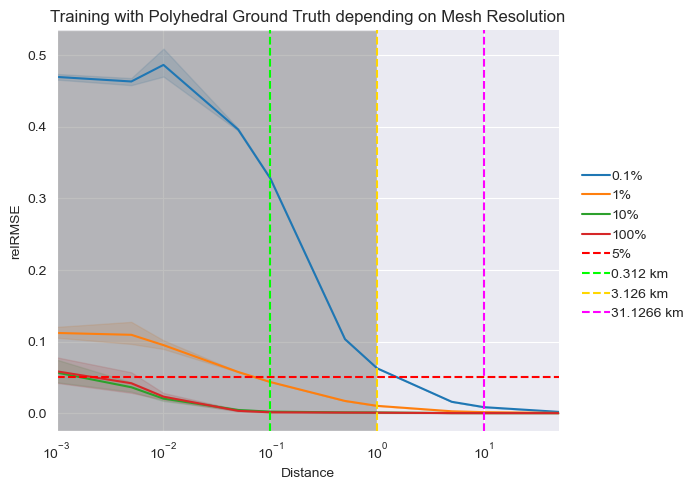

In [20]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_mesh_resolution_comparison_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

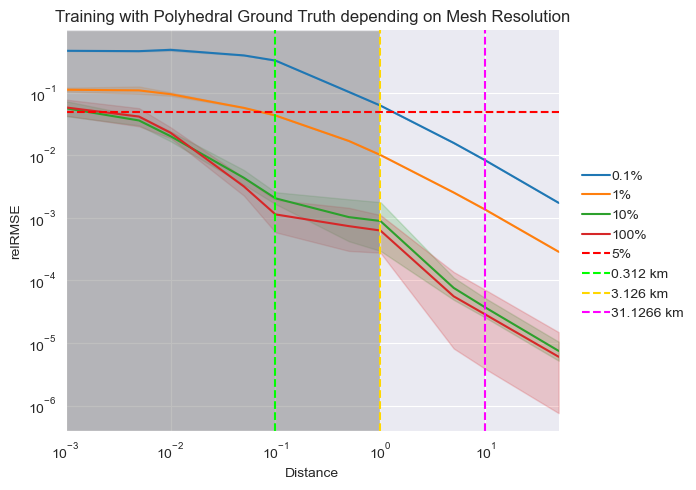

In [21]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log', yscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_mesh_resolution_comparison_norm_{error_of_interest}_log_line.png")
g.savefig(save_path, dpi=300)